### 생선 분류
- datasets: fish.csv
- feature: Weghit, Length
- label/target: Species
- learning method: supervised learning classification
- learning algorithm: KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = '../data/fish.csv'

In [3]:
# rows: Bream, Smelt
# columns: Species, Weight, Length

fish_df = pd.read_csv(DATA_FILE, usecols=[0, 1, 2])

In [7]:
mask = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
two_fish_df = fish_df.loc[mask]

In [9]:
two_fish_df = two_fish_df.reset_index().drop('index', axis=1)
two_fish_df.tail()

,Species,Weight,Length
44,Smelt,12.2,12.2
45,Smelt,13.4,12.4
46,Smelt,12.2,13.0
47,Smelt,19.7,14.3
48,Smelt,19.9,15.0


In [10]:
# Species column to int
names = fish_df['Species'].unique().tolist()  # numpy 소스
mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
fish_df['Species_Code'] = fish_df['Species'].map(mapping)
fish_df

,Species,Weight,Length,Species_Code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0
...,...,...,...,...
154,Smelt,12.2,12.2,6
155,Smelt,13.4,12.4,6
156,Smelt,12.2,13.0,6
157,Smelt,19.7,14.3,6


In [12]:
# Species column to int
names = two_fish_df['Species'].unique().tolist()  # numpy 소스
mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
two_fish_df['Species_Code'] = two_fish_df['Species'].map(mapping)
two_fish_df.tail()

,Species,Weight,Length,Species_Code
44,Smelt,12.2,12.2,1
45,Smelt,13.4,12.4,1
46,Smelt,12.2,13.0,1
47,Smelt,19.7,14.3,1
48,Smelt,19.9,15.0,1


In [13]:
# train_data, test_data split
from sklearn.model_selection import train_test_split

In [14]:
# feature & label
feature = two_fish_df[['Weight', 'Length']]
label = two_fish_df['Species_Code']

print(f"feature.shape: {feature.shape}, {feature.ndim}D")
print(f"label.shape: {label.shape}, {label.ndim}D")

feature.shape: (49, 2), 2D
label.shape: (49,), 1D


In [19]:
# train:test = 80:20 ---> test_size=0.2 or train_size=0.8
# 나는 보봉은 7:3 많이 사용하는디 ㅇㅅㅇ 그렇게 배웠으니까
# if classification, stratify (parameter): label's rate consider
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=14, stratify=label)

In [21]:
print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")
print()
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")

X_train: (39, 2), 2D
y_train: (39,), 1D

X_test: (10, 2), 2D
y_test: (10,), 1D


In [26]:
# label's 'Speacise' ratio
print(y_train.value_counts()[0] / y_train.shape[0] * 100, y_train.value_counts()[1]/ y_train.shape[0] * 100)

71.7948717948718 28.205128205128204


In [32]:
print(y_test.value_counts()[0]/y_test.shape[0]*100, y_test.value_counts()[1]/y_test.shape[0] * 100)

70.0 30.0


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier()

In [29]:
# learning
model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# after learning
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

In [36]:
# 모델 성능 평가
model.score(X_test, y_test)

1.0

In [40]:
# prediction --> non train, validation data use
# - notion: input data ==> 2D: need name, so input data shape is DataFrame
# - excet: np.array don't need columns names

new_data = pd.DataFrame([[413, 27.8]], columns=model.feature_names_in_)
model.predict(new_data)

array([0], dtype=int64)

In [41]:
# find k-nearset data
distance, index = model.kneighbors(new_data)

In [42]:
print(distance, index, sep='\n')

[[17.04230031 37.04875167 37.0653477  50.01439793 73.01157442]]
[[ 3  9 26  4 38]]


In [46]:
neighbors = index.reshape(-1).tolist()  # 1D data

In [47]:
two_fish_df.loc[neighbors,:]

,Species,Weight,Length,Species_Code
3,Bream,363.0,29.0,0
9,Bream,500.0,30.7,0
26,Bream,720.0,35.0,0
4,Bream,430.0,29.0,0
38,Smelt,9.7,11.0,1


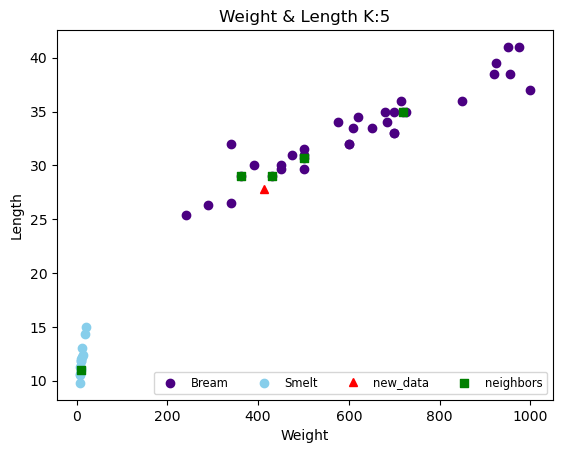

In [58]:
# visualization
# 물고기 종류에 따라 색을 다르게
plt.scatter(two_fish_df.loc[:34,'Weight'], two_fish_df.loc[:34,'Length'], c='indigo', label='Bream')
plt.scatter(two_fish_df.loc[35:,'Weight'], two_fish_df.loc[35:,'Length'], c='skyblue', label='Smelt')
plt.plot(new_data['Weight'], new_data['Length'], 'r^', label='new_data')
plt.scatter(two_fish_df.loc[neighbors, 'Weight'], two_fish_df.loc[neighbors, 'Length'], c='green', marker='s', label='neighbors')

plt.title('Weight & Length K:5')
plt.ylabel('Length')
plt.xlabel('Weight')
plt.legend(loc='lower right', ncol=4, fontsize='small')
plt.show()